## Using scikit-learn for classification

Up to now, we have been working with individual models, but this time we will look at how to use the scikit-learn library to select and train different classification models, evaluate them properly, and compare their performance. In addition, we will also introduce some basic dimensionality reduction methods, which are often useful in practical data preparation.

In [1]:
import sklearn

### Learning Algorithms and Classifiers

Classification uses two types of objects: learning algorithms and classifiers. Learning algorithms take data labeled with a class and return a classifier. Based on the first three data instances, classifiers return the indices of the predicted class:

In [2]:
import pandas as pd
data = pd.read_table("../data/voting.tab", skiprows=[1,2])
data.head()

,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [3]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(max_iter=1000)

X = data.drop('party', axis=1).values
y = data['party'].values
try:
    LR.fit(X, y)
except Exception as e:
    print(e)

could not convert string to float: 'n'


### Data preprocessing

When working with raw data, we encounter various problems. For example, many features are categorical (for example: “y” and “n”). Most scikit-learn models, however, expect numerical input. If we attempt to train a model directly on these strings, we encounter an error similar to the one above.

To work with such data, we first need to convert categorical values into numerical representations. This step is part of the preprocessing process, and scikit-learn provides convenient tools for it. One simple approach is to use an OrdinalEncoder, which maps each category to an integer value.

In [4]:
from sklearn import preprocessing

enc = preprocessing.OrdinalEncoder()
X = enc.fit_transform(X)
X[:5,:5]

array([[ 0.,  1.,  0.,  1.,  1.],
       [ 0.,  1.,  0.,  1.,  1.],
       [nan,  1.,  1., nan,  1.],
       [ 0.,  1.,  1.,  0., nan],
       [ 1.,  1.,  1.,  0.,  1.]])

In [5]:
try:
    LR.fit(X, y)
except Exception as e:
    print(e)

Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values


The data contains missing values (NaN). Before we can apply learning algorithms, we need to fill them appropriately. We can use an imputer, which replaces the missing values with suitable estimates.

In [6]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='mean')
imp.fit(X)
X = imp.transform(X)
X[:5,:5]

array([[0.        , 1.        , 0.        , 1.        , 1.        ],
       [0.        , 1.        , 0.        , 1.        , 1.        ],
       [0.44208038, 1.        , 1.        , 0.41745283, 1.        ],
       [0.        , 1.        , 1.        , 0.        , 0.5047619 ],
       [1.        , 1.        , 1.        , 0.        , 1.        ]])

In [7]:
model = LR.fit(X, y)

### Predicting

Once the model is trained, we can use it to make predictions on new or existing data. For example, we can predict the classes of the first three instances in our dataset:

In [8]:
for i in range(5,8):
    c = model.predict(X[i].reshape(1, -1))
    print("{}, originally {}".format(c[0], y[i]))

democrat, originally democrat
republican, originally democrat
republican, originally republican


##### Question 8-1-1

Try out several imputation strategies (e.g., mean, median, most frequent).
Do they lead to different predictions?

[Answer](208-1.ipynb#Answer-8-1-1)

To find out what is the probability that the classifier assigns to, say, democrat class, we need to call the classifier with another function, that returns the probabilities for each class.

In [9]:
target_class = 0
print("Probabilities for %s:" % model.classes_[target_class])
for i in range(5,8):
    probabilities = model.predict_proba(X[i].reshape(1, -1))
    print("{}, originally {}".format(probabilities[0, target_class], y[i]))

Probabilities for democrat:
0.9825228000129097, originally democrat
0.16061789979173025, originally democrat
0.10249298023889775, originally republican


Logistic regression has made a mistake in the second case, but otherwise predicted correctly. 

##### Question 8-1-2

Take a closer look at the data. Does this prediction make sense?

Hint: check how this representative actually voted on each issue and compare their voting pattern to the typical behavior of their party.

Does this person follow their party line, or do they frequently vote outside it, making them hard (or even impossible) to classify?

[Answer](208-1.ipynb#Answer-8-1-2)

### Dimensionality reduction and data structure

The voting dataset contains many correlated features. Some votes tend to go together, and others may carry little additional information. Dimensionality reduction methods attempt to represent the data using fewer, more informative features while preserving as much structure as possible.

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_pca[:5,:]

array([[1.73424879, 0.03162589],
       [1.76736331, 0.31212222],
       [0.95083794, 1.25281572],
       [0.33492122, 1.27331656],
       [0.47178748, 1.30560354]])

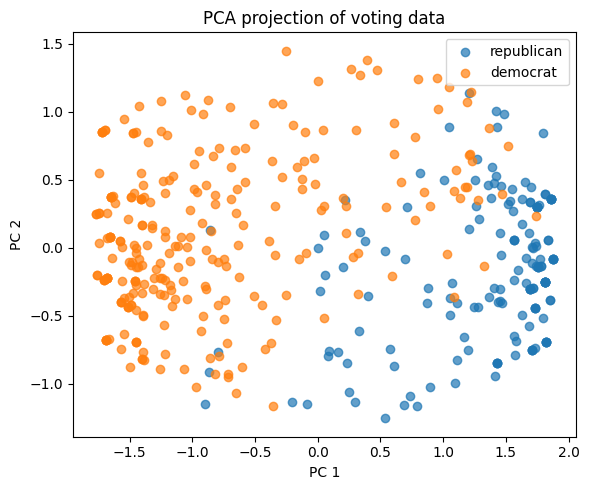

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
for party in set(y):
    idx = (y == party)
    plt.scatter(
        X_pca[idx, 0],
        X_pca[idx, 1],
        label=party,
        alpha=0.7
    )

plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.title("PCA projection of voting data")
plt.legend()
plt.tight_layout()
plt.show()

### Evaluation

Last week we learnt of ways to evaluate the quality of classifiers.

In [12]:
from sklearn.metrics import accuracy_score
print("Accuracy: %.1f" % (accuracy_score(y, model.predict(X))*100)+"%")

Accuracy: 97.2%


#### ROC curve and Area Under Curve (AUC)

The ROC curve is a way to assess the quality of the classification. Typically, the y axis indicates true positive rate, and the x axis the false positive rate. The upper left corner represents an ideal model without false positives and with a 100% true positive rate.

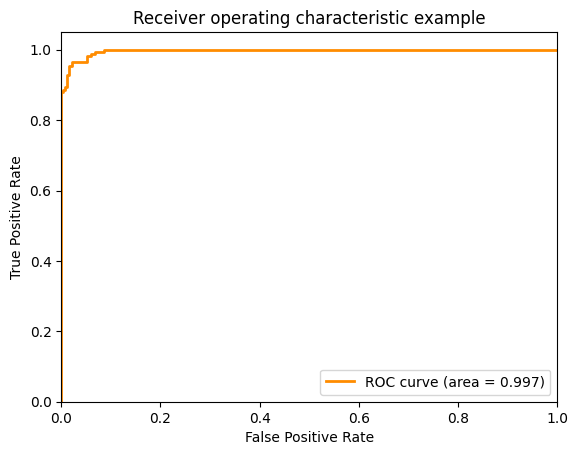

In [13]:
from sklearn.metrics import roc_curve, auc

predictions = model.predict_proba(X)
fpr, tpr, _ = roc_curve(y, predictions[:,1], pos_label='republican')
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.3f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

No wonder we achieved such a high score, since this was also the data the model trained from.

### Cross-Validation

Validating the accuracy of classifiers on the training data, as we did above, serves demonstration purposes only. Any performance measure that assesses accuracy should be estimated on an independent test set. A single train–test split, however, can be misleading: the result may depend heavily on which specific instances ended up in the training set and which in the test set. If the split is “unlucky,” the evaluation may be overly optimistic or overly pessimistic.

Cross-validation addresses this by repeating the splitting procedure multiple times. It averages the evaluation scores across several runs, each time using different training and test subsets sampled from the original dataset. This produces a more stable and reliable estimate of the model’s performance.

In [14]:
from sklearn.model_selection import cross_validate

model = LogisticRegression()
scores = cross_validate(model, X, y, cv=5, scoring=['accuracy', 'roc_auc'])

print("Accuracy: %.3f" % scores['test_accuracy'].mean())
print("AUC:      %.3f" % scores['test_roc_auc'].mean())

Accuracy: 0.954
AUC:      0.992


Where did we make a mistake?

We performed preprocessing, which is also part of the learning process, on the entire dataset. This means that the model had access to information from the test set during training, which leads to data leakage and consequently biased performance estimates. To correctly evaluate the full procedure, preprocessing must always be carried out only on the training set and then applied to the test set.

Managing all these steps manually quickly becomes cumbersome, especially with methods like cross-validation, where the training and test sets change repeatedly. To avoid errors and simplify the workflow, scikit-learn provides pipelines.

### Pipeline

A pipeline combines all steps (from preprocessing to model training) into a single object. Each step in the pipeline is executed in sequence. All steps except the last must be transformers, meaning they implement both `fit()` and `transform()` (e.g., encoders, imputers, scalers). The final step is the estimator, which implements `fit()` and typically `predict()`.

During each train–test split, the entire sequence is handled correctly: the preprocessing steps are fitted on the training set, the data is transformed, and only then is the model trained. This ensures proper, consistent, and safe model evaluation.

In [15]:
import numpy as np
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ("encoder", preprocessing.OrdinalEncoder()),
    ("imputer", SimpleImputer(missing_values=np.nan, strategy='mean')),    
    ("pca", PCA()),
    ("model", LogisticRegression())
])
scores = cross_validate(pipe, data.drop('party', axis=1), data['party'], cv=5, scoring=['accuracy', 'roc_auc'])

print("Accuracy: %.3f" % scores['test_accuracy'].mean())
print("AUC:      %.3f" % scores['test_roc_auc'].mean())

Accuracy: 0.956
AUC:      0.992


### Searching for the Best Model

Scikit-learn includes many different classification algorithms, such as:

* logistic regression (`sklearn.linear_model.LogisticRegression`)
* k-nearest neighbors (`sklearn.neighbors.KNeighborsClassifier`)
* support vector machines (say, `sklearn.svm.SVC`)
* classification trees (`sklearn.tree.DecisionTreeClassifier`)
* random forest (`sklearn.ensemble.RandomForestClassifier`)

A pipeline can only contain one final estimator, since the last step must implement the `predict()` method. If we want to compare different models fairly, we need to ensure that all of them are trained in exactly the same way: with the same preprocessing steps and using the same train/test splits in cross-validation.

Instead of manually building separate pipelines for each model, we can use `GridSearchCV`. By passing different model choices through the `param_grid` parameter, we allow `GridSearchCV` to swap the final estimator inside the pipeline. It then trains and evaluates each model using the same cross-validation procedure and identifies the one with the best performance.

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

param_grid = [
    {"model": [LogisticRegression()]},
    {"model": [DecisionTreeClassifier()]},
    {"model": [KNeighborsClassifier()]},
]

search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')
search.fit(data.drop('party', axis=1), data['party'])
print("Best model:", search.best_params_['model'])
print("Best accuracy: %.3f" % search.best_score_)

Best model: LogisticRegression()
Best accuracy: 0.956


## Using scikit-learn for regression

Regression in scikit-learn is very similar to classification. Both require labeled data. Just like in classification, regression is implemented with learners and regression models (regressors). Regression learners are objects that accept data and return regressors. Regression models are given data items to predict the value of continuous class.

##### Question 8-1-3

Apply the same techniques to a regression problem.

Choose a regression model, prepare the data (encoding, handling missing values, cross-validation), and test how these approaches work when predicting continuous values.

In [17]:
from sklearn.datasets import fetch_california_housing
X, y = fetch_california_housing(return_X_y=True, as_frame=True)

[Answer](208-1.ipynb#Answer-8-1-3)